<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Fuzzy_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=GppQ9xpE5l0

### Car Breaking System Using Mamdani Fuzzy Logic Control

https://youtu.be/GppQ9xpE5l0?t=52

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
carPosition = ctrl.Antecedent(np.arange(0, 61, 1), 'carPosition') # input
carVelocity = ctrl.Antecedent(np.arange(0, 101, 1), 'carVelocity') # input
brakeForce  = ctrl.Consequent(np.arange(0, 9264), 'brakeForce') # output

## Generate fuzzy membership function

### Car Position

In [ ]:
carPosition['verynear'] = fuzz.gauss2mf(carPosition.universe, -2.76, 10, 3.773, 3.86) # mean, sigma1, mean2, sigma2
carPosition['near']     = fuzz.gaussmf(carPosition.universe, 18.42, 4.21)             # mean, sigma1
carPosition['medium']   = fuzz.gaussmf(carPosition.universe, 27.76, 3.96)             # mean, sigma1
carPosition['far']      = fuzz.gaussmf(carPosition.universe, 38, 3.54)
carPosition['veryfar']  = fuzz.gauss2mf(carPosition.universe, 51, 3.46, 63.3, 5.1)

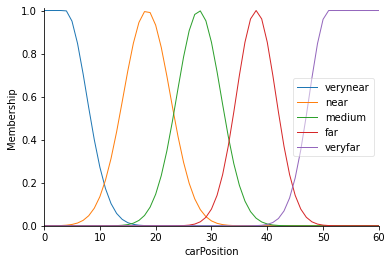

In [ ]:
carPosition.view()

### Car Velocity

In [ ]:
carVelocity['veryslow']   = fuzz.gauss2mf(carVelocity.universe, -0.153, 10, 7.945, 4.02)  # mean, sigma1, mean2, sigma2
carVelocity['slow']       = fuzz.gaussmf(carVelocity.universe, 27.96, 6.6)                # mean, sigma1
carVelocity['medium']     = fuzz.gaussmf(carVelocity.universe, 42.26, 11.3)
carVelocity['fast']       = fuzz.gaussmf(carVelocity.universe, 53.6, 7.177)
carVelocity['veryfast']   = fuzz.gauss2mf(carVelocity.universe, 68.18, 4.04, 103.6, 6.48)

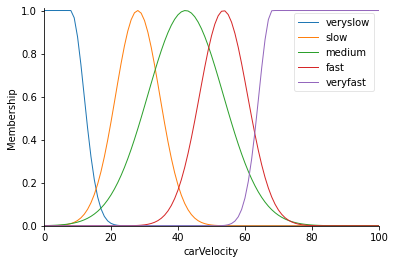

In [ ]:
carVelocity.view()

### Break Force

In [ ]:
brakeForce['small']   = fuzz.gaussmf(brakeForce.universe, 2530, 730.4)
brakeForce['medium']  = fuzz.gaussmf(brakeForce.universe, 4760, 1325)
brakeForce['big']     = fuzz.gaussmf(brakeForce.universe, 6120, 1090)

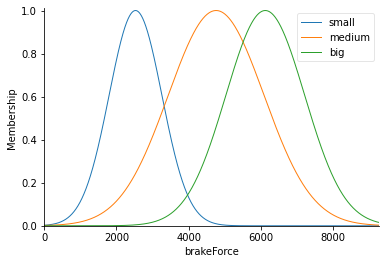

In [ ]:
brakeForce.view()

## Rules

In [ ]:
rule1 = ctrl.Rule(carPosition['verynear'] & carVelocity['veryslow'], brakeForce['small'])
rule2 = ctrl.Rule(carPosition['verynear'] & carVelocity['slow'], brakeForce['small'])
rule3 = ctrl.Rule(carPosition['verynear'] & carVelocity['medium'], brakeForce['small'])
rule4 = ctrl.Rule(carPosition['verynear'] & carVelocity['fast'], brakeForce['medium'])
rule5 = ctrl.Rule(carPosition['verynear'] & carVelocity['veryfast'], brakeForce['medium'])

rule6 = ctrl.Rule(carPosition['near'] & carVelocity['veryslow'], brakeForce['small'])
rule7 = ctrl.Rule(carPosition['near'] & carVelocity['slow'], brakeForce['small'])
rule8 = ctrl.Rule(carPosition['near'] & carVelocity['medium'], brakeForce['small'])
rule9 = ctrl.Rule(carPosition['near'] & carVelocity['fast'], brakeForce['medium'])
rule10 = ctrl.Rule(carPosition['near'] & carVelocity['veryfast'], brakeForce['medium'])

rule11 = ctrl.Rule(carPosition['medium'] & carVelocity['veryslow'], brakeForce['small'])
rule12 = ctrl.Rule(carPosition['medium'] & carVelocity['slow'], brakeForce['small'])
rule13 = ctrl.Rule(carPosition['medium'] & carVelocity['medium'], brakeForce['medium'])
rule14 = ctrl.Rule(carPosition['medium'] & carVelocity['fast'], brakeForce['big'])
rule15 = ctrl.Rule(carPosition['medium'] & carVelocity['veryfast'], brakeForce['big'])

rule16 = ctrl.Rule(carPosition['far'] & carVelocity['veryslow'], brakeForce['medium'])
rule17 = ctrl.Rule(carPosition['far'] & carVelocity['slow'], brakeForce['medium'])
rule18 = ctrl.Rule(carPosition['far'] & carVelocity['medium'], brakeForce['medium'])
rule19 = ctrl.Rule(carPosition['far'] & carVelocity['fast'], brakeForce['medium'])
rule20 = ctrl.Rule(carPosition['far'] & carVelocity['veryfast'], brakeForce['big'])

rule21 = ctrl.Rule(carPosition['veryfar'] & carVelocity['veryslow'], brakeForce['medium'])
rule22 = ctrl.Rule(carPosition['veryfar'] & carVelocity['slow'], brakeForce['medium'])
rule23 = ctrl.Rule(carPosition['veryfar'] & carVelocity['medium'], brakeForce['big'])
rule24 = ctrl.Rule(carPosition['veryfar'] & carVelocity['fast'], brakeForce['big'])
rule25 = ctrl.Rule(carPosition['veryfar'] & carVelocity['veryfast'], brakeForce['big'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07c56b6ed0>)

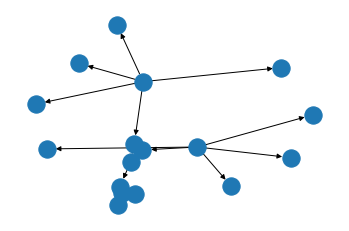

In [ ]:
rule25.view()

## Control Simulator

In [ ]:
breaksystem_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,
                                       rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25 ])


breaksystem_simulator = ctrl.ControlSystemSimulation(breaksystem_ctrl, flush_after_run=21 * 21 +1)

In [ ]:
print('-------------- position ---------------')
input = 30
for i in carPosition.terms:
  mval = np.interp(input, carPosition.universe, carPosition[i].mf)
  print('{0}     \t\t {1:.4f}'.format(i, mval))

-------------- position ---------------
verynear     		 0.0000
near     		 0.0228
medium     		 0.8522
far     		 0.0778
veryfar     		 0.0000


In [ ]:
print('-------------- velocity ---------------')
input = 50
for i in carVelocity.terms:
  mval = np.interp(input, carVelocity.universe, carVelocity[i].mf)
  print('{0}     \t\t {1:.4f}'.format(i, mval))

-------------- velocity ---------------
veryslow     		 0.0000
slow     		 0.0038
medium     		 0.7909
fast     		 0.8818
veryfast     		 0.0000


Simulator

In [ ]:
breaksystem_simulator.input['carPosition'] = 30
breaksystem_simulator.input['carVelocity'] = 50

Evaluate the result

In [ ]:
breaksystem_simulator.compute()

View the results

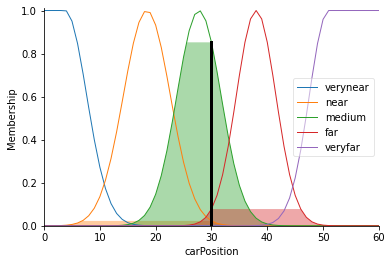

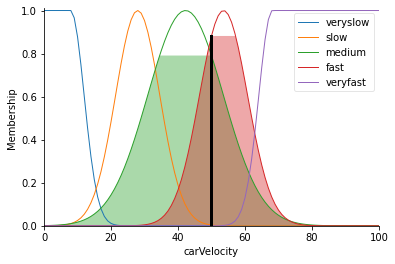

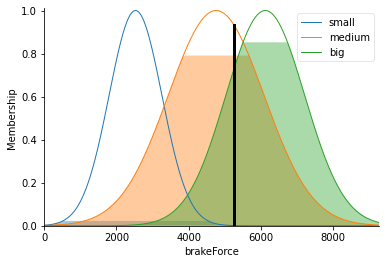

In [ ]:
carPosition.view(sim=breaksystem_simulator)
carVelocity.view(sim=breaksystem_simulator)
brakeForce.view(sim=breaksystem_simulator)

In [ ]:
breaksystem_simulator.output['brakeForce']

5251.813059939534

## Surface Graphic

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# We can simulate at highe resolution with full accuray

# upsampled =  np.linspace(0, 60, 60)

position = np.linspace(0, 60, 60)
velocity = np.linspace(0, 100, 100)

x, y = np.meshgrid(position, velocity)

# print(upsampled)

z = np.zeros_like(x)

z.shape

(100, 60)

In [ ]:
# Loop through the system 21*21 times to collect the control surface

for i in range(100):
  for j in range(60):
    breaksystem_simulator.input['carPosition'] = x[i, j]
    breaksystem_simulator.input['carVelocity'] = y[i, j]
    breaksystem_simulator.compute()
    z[i, j] = breaksystem_simulator.output['brakeForce']

In [ ]:
%%capture
!pip install plotly

In [ ]:
%%capture
!pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)
iplot(fig, filename = 'jupyter-parametric-plot')

## Related Work

https://ieeexplore.ieee.org/document/8323547


### Design car braking system using Mamdani Fuzzy Logic Control

Abstract:

Car braking system is the most important safety system that it has. This paper provides an automatic car braking system using Mamdani Fuzzy Logic Control. This car breaking system consists of two inputs and one output. Inputs are car position and car velocity. Car position represents the distance of the car from the obstacle detected and velocity represents the velocity of the car towards the obstacle. This output is brake that represents the car force to stop the car. The inputs use five membership functions and the output use three membership functions. The car braking system designed uses twenty five rules. Braking performance will be observed in term of distance and velocity to prevent collision.
